Поскольку в стандартных библиотеках машинного обучения (Scikit-Learn, Keras,
PyTorch и т.д.) нет встроенной процедуры для SOM, выполним реализацию
самостоятельно с помощью numpy и matplotlib.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Функция для нахождения координат ячейки сетки наиболее подходящего
экземпляра на заданной сетке SOM обучающего примера x.

In [ ]:
def find_BMU(SOM,x):
    distSq = (np.square(SOM - x)).sum(axis=2)
    return np.unravel_index(np.argmin(distSq, axis=None), distSq.shape)

Функция для обновления веса ячеек SOM при наличии одного обучающего
примера, на основе параметров модели и координат BMU (best matching unit).

In [ ]:
# Функция для обновления веса ячеек SOM при наличии одного обучающего
#примера и параметры модели вместе с координатами BMU в виде кортежа
def update_weights(SOM, train_ex, learn_rate, radius_sq,
                   BMU_coord, step=3):
    g, h = BMU_coord
    # если радиус близок к нулю, то меняется только BMU
    if radius_sq < 1e-3:
        SOM[g,h,:] += learn_rate * (train_ex - SOM[g,h,:])
        return SOM
    #Замена всех ячеек в близости BMU.
    for i in range(max(0, g-step), min(SOM.shape[0], g+step)):
        for j in range(max(0, h-step), min(SOM.shape[1], h+step)):
            dist_sq = np.square(i - g) + np.square(j - h)
            dist_func = np.exp(-dist_sq / 2 / radius_sq)
            SOM[i,j,:] += learn_rate * dist_func * (train_ex -
SOM[i,j,:])
    return SOM

Функция тренировки SOM

In [ ]:
def train_SOM(SOM, train_data, learn_rate = .1, radius_sq = 1,
             lr_decay = .1, radius_decay = .1, epochs = 10):
    learn_rate_0 = learn_rate
    radius_0 = radius_sq
    for epoch in np.arange(0, epochs):
        rand.shuffle(train_data)
        for train_ex in train_data:
            g, h = find_BMU(SOM, train_ex)
            SOM = update_weights(SOM, train_ex,
                                 learn_rate, radius_sq, (g,h))
        # Обновление значений коэффициентов скорости обучения и радиуса
        learn_rate = learn_rate_0 * np.exp(-epoch * lr_decay)
        radius_sq = radius_0 * np.exp(-epoch * radius_decay)
    return SOM

 Запуск самоорганизующейся карты на практическом примере

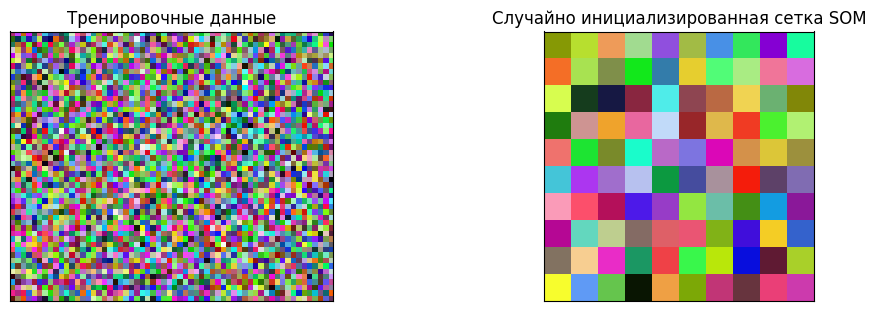

In [ ]:
# Размеры сетки СОМ
m = 10
n = 10
# Количество обучающих примеров
n_x = 3000
rand = np.random.RandomState(0)
# Инициализация данных для обучения
train_data = rand.randint(0, 255, (n_x, 3))
# Инициализация SOM случайным образом
SOM = rand.randint(0, 255, (m, n, 3)).astype(float)
# Отображение обучающей матрицы и сетки SOM.
fig, ax = plt.subplots(
nrows=1, ncols=2, figsize=(12, 3.5),
subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(train_data.reshape(50, 60, 3))
ax[0].title.set_text('Тренировочные данные')
ax[1].imshow(SOM.astype(int))
ax[1].title.set_text('Случайно инициализированная сетка SOM')

Далее обучим карту SOM и выведем через каждые 5 эпох (1 эпоха, потом еще 4,
потом еще 5, еще 10, которые в сумме дадут 20 эпох обучения сети) результаты, чтобы
получить краткий обзор прогресса обучения:


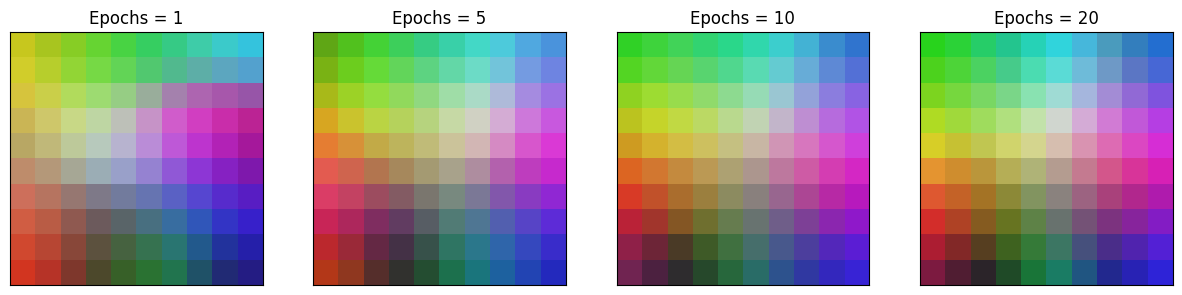

In [ ]:
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5),
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
for epochs, i in zip([1, 4, 5, 10], range(0,4)):
    total_epochs += epochs
    SOM = train_SOM(SOM, train_data, epochs=epochs)
    ax[i].imshow(SOM.astype(int))
    ax[i].title.set_text('Epochs = ' + str(total_epochs))

Чтобы увидеть, как коэффициенты скорости и радиуса обучения варьируются
для разных экспериментов, напишем следующий код

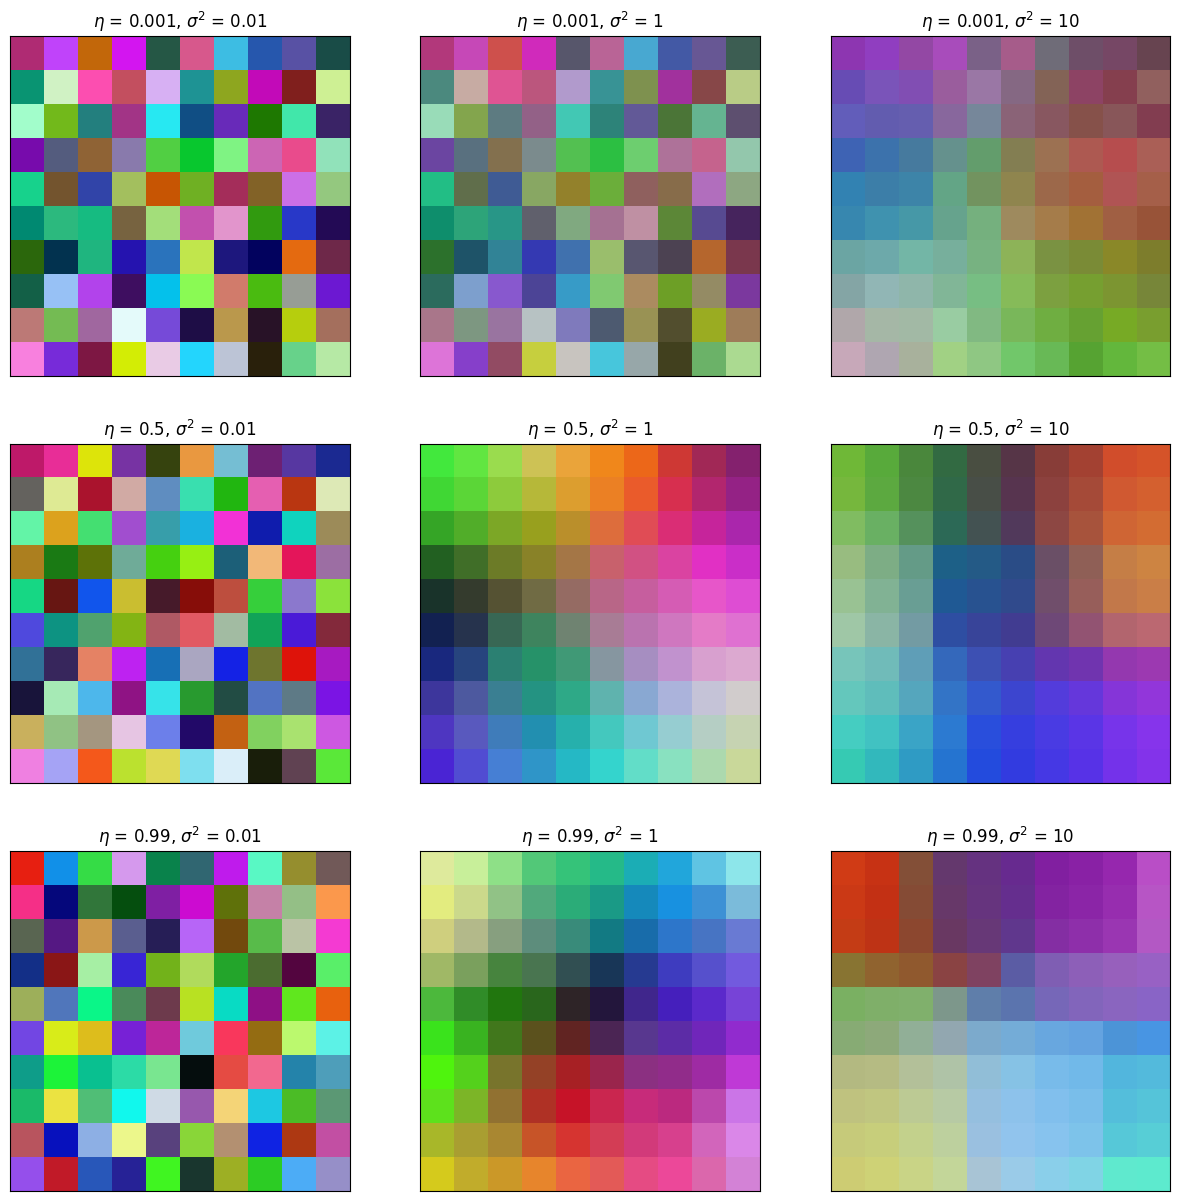

In [ ]:
fig, ax = plt.subplots(
    nrows=3, ncols=3, figsize=(15, 15),
    subplot_kw=dict(xticks=[], yticks=[]))
# Инициализируем SOM случайным образом в одном и том же состоянии (рандом происходит однократно)
for learn_rate, i in zip([0.001, 0.5, 0.99], [0, 1, 2]):
    for radius_sq, j in zip([0.01, 1, 10], [0, 1, 2]):
        rand = np.random.RandomState(0)
        SOM = rand.randint(0, 255, (m, n, 3)).astype(float)
        SOM = train_SOM(SOM, train_data, epochs =5,
                        learn_rate = learn_rate,
                        radius_sq = radius_sq)
        ax[i][j].imshow(SOM.astype(int))
        ax[i][j].title.set_text('$\eta$ = ' + str(learn_rate) +
                                ', $\sigma^2$ = ' + str(radius_sq))

Проведите эксперименты на разные размеры сетки SOM (m*n),
количество обучающих примеров, подбирая параметры коэффициентов скорости и
радиуса обучения, внимательно изучите входные параметры функции train_SOM

In [ ]:
def train_SOM(SOM, train_data, learn_rate = .1, radius_sq = 1,
             lr_decay = .1, radius_decay = .1, epochs = 5):
    learn_rate_0 = learn_rate
    radius_0 = radius_sq
    for epoch in np.arange(0, epochs):
        rand.shuffle(train_data)
        for train_ex in train_data:
            g, h = find_BMU(SOM, train_ex)
            SOM = update_weights(SOM, train_ex,
                                 learn_rate, radius_sq, (g,h))
        # Обновление значений коэффициентов скорости обучения и радиуса
        learn_rate = learn_rate_0 * np.exp(-epoch * lr_decay)
        radius_sq = radius_0 * np.exp(-epoch * radius_decay)
    return SOM

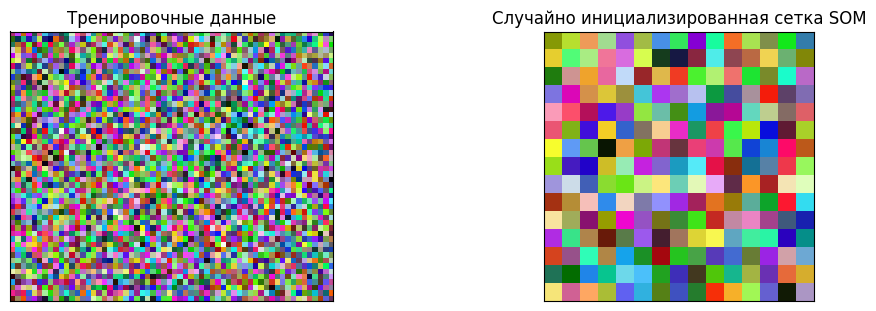

In [ ]:
import matplotlib.pyplot as plt
# Размеры сетки СОМ
m = 15
n = 15
# Количество обучающих примеров
n_x = 3000
rand = np.random.RandomState(0)
# Инициализация данных для обучения
train_data = rand.randint(0, 255, (n_x, 3))
# Инициализация SOM случайным образом
SOM = rand.randint(0, 255, (m, n, 3)).astype(float)
# Отображение обучающей матрицы и сетки SOM.
fig, ax = plt.subplots(
nrows=1, ncols=2, figsize=(12, 3.5),
subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(train_data.reshape(50, 60, 3))
ax[0].title.set_text('Тренировочные данные')
ax[1].imshow(SOM.astype(int))
ax[1].title.set_text('Случайно инициализированная сетка SOM')

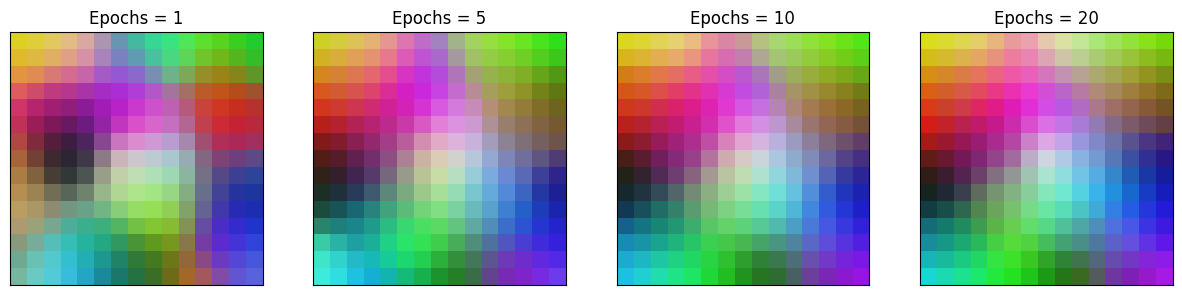

In [ ]:
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5),
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
for epochs, i in zip([1, 4, 5, 10], range(0,4)):
    total_epochs += epochs
    SOM = train_SOM(SOM, train_data, epochs=epochs)
    ax[i].imshow(SOM.astype(int))
    ax[i].title.set_text('Epochs = ' + str(total_epochs))